## Portfolio Optimzation Methods

In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
# from scipy.optimize import minimize
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 10

TRADING_DAYS_PER_YEAR = 252
RISK_FREE_RATE = 0.043
NUMBER_OF_PORTFOLIOS = 3000

In [18]:
tamid = {'FTAI': '2021-02-01',
        'AMT': '2021-02-01',
        'NEE': '2020-10-01',
        'TDOC': '2020-10-01',
        'INTC': '2020-10-01',
        'FISV': '2020-10-01',
        'DAL': '2021-02-01',
        'ISRG': '2021-02-01',
        'GOOS': '2021-02-01',
        'TXN': '2021-02-01',
        'TSM': '2021-10-01',
        'MHK': '2021-10-01',
        'ACLS': '2021-10-01',
        'EPD': '2021-10-01',
        'PLYM': '2021-10-01'
       }

stocks = [k for k,v in tamid.items()]
# a = ['aapl', 'tsla', 'msft', 'amzn', 'gm', 'nflx', 'googl', 'meta']

a = [k for k,v in tamid.items()]

data = yf.download(a, start="2015-01-01")[["Adj Close"]]
returns = data.pct_change().dropna()
returns.columns = a

[*********************100%***********************]  15 of 15 completed


In [19]:
log_rets = np.log(1+returns)

In [20]:
log_rets

,FTAI,AMT,NEE,TDOC,INTC,FISV,DAL,ISRG,GOOS,TXN,TSM,MHK,ACLS,EPD,PLYM
Date,,,,,,,,,,,,,,,
2017-06-12,0.002073,-0.008479,-0.014441,-0.009278,0.002601,-0.005666,-0.034978,0.000560,-0.014344,-0.002585,-0.005864,-0.004906,-0.030475,-0.015487,0.001852
2017-06-13,-0.002073,0.007788,-0.007299,-0.004859,0.010739,0.010050,0.048009,0.004189,0.005454,0.010011,0.003794,-0.003833,0.060050,0.009040,-0.000740
2017-06-14,-0.033759,0.002378,0.000771,-0.008277,0.000883,-0.005641,-0.035905,-0.009803,-0.002646,0.007576,0.008538,-0.012697,0.012195,0.002528,-0.010301
2017-06-15,-0.026088,0.007747,-0.006765,0.008651,0.006798,-0.008205,-0.019627,-0.006211,-0.007635,-0.005347,0.005088,0.005540,0.010550,-0.005908,-0.000999
2017-06-16,0.036761,0.008219,0.008498,0.004484,-0.006557,-0.000634,-0.030668,-0.002836,0.017533,-0.002312,0.006814,0.018611,0.019303,0.012060,-0.004757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-25,0.043078,0.053198,0.018759,0.010010,0.027657,0.025381,0.052027,0.008426,0.076870,0.039580,0.034602,0.033421,0.082569,-0.002450,0.003150
2022-10-26,0.013389,0.007084,0.000000,0.005166,0.016647,-0.017263,-0.021397,-0.007323,0.015808,-0.016496,-0.003433,-0.007269,-0.000374,-0.004919,-0.026812
2022-10-27,-0.022764,0.008898,0.005589,-0.003176,-0.029418,0.019095,-0.045409,-0.035157,0.000124,-0.003556,-0.001721,0.030942,0.062690,0.001806,-0.007056


In [21]:
weights = np.array(np.random.random(len(a)))
weights

array([0.41070333, 0.82679947, 0.3513424 , 0.7171904 , 0.82164621,
       0.79386396, 0.44395356, 0.62434179, 0.93724973, 0.36321923,
       0.86708307, 0.20774637, 0.26556658, 0.45186213, 0.80749333])

In [22]:
weights /= np.sum(weights)

weights

array([0.04619803, 0.09300267, 0.03952081, 0.08067328, 0.09242301,
       0.08929791, 0.04993819, 0.07022919, 0.10542669, 0.04085677,
       0.09753398, 0.02336838, 0.0298723 , 0.05082778, 0.09083102])

In [23]:
np.sum(weights)

1.0000000000000002

In [24]:
exp_rets = np.sum((log_rets.mean()*weights)*TRADING_DAYS_PER_YEAR)
exp_rets

0.0840723415422602

In [25]:
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_rets.cov()*TRADING_DAYS_PER_YEAR, weights)))
print(exp_vol)

0.2423114493412241


In [26]:
SR = (exp_ret - RISK_FREE_RATE)/exp_vol
print(SR)

NameError: name 'exp_ret' is not defined

In [27]:
num_ports = 5000
all_weights = np.zeros((num_ports, len(a)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports): 
    # weights 
    weights = np.array(np.random.random(len(a))) 
    weights = weights/np.sum(weights)  
    # save the weights
    all_weights[ind,:] = weights

    # expected return 
    ret_arr[ind] = np.sum((log_rets.mean()*weights)*TRADING_DAYS_PER_YEAR)

    # expected volatility 
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_rets.cov()*TRADING_DAYS_PER_YEAR, weights)))

    # Sharpe Ratio 
    sharpe_arr[ind] = (ret_arr[ind] - RISK_FREE_RATE)/vol_arr[ind]

In [28]:
sharpe_arr.max()

0.2921140060044225

Text(0, 0.5, 'Return')

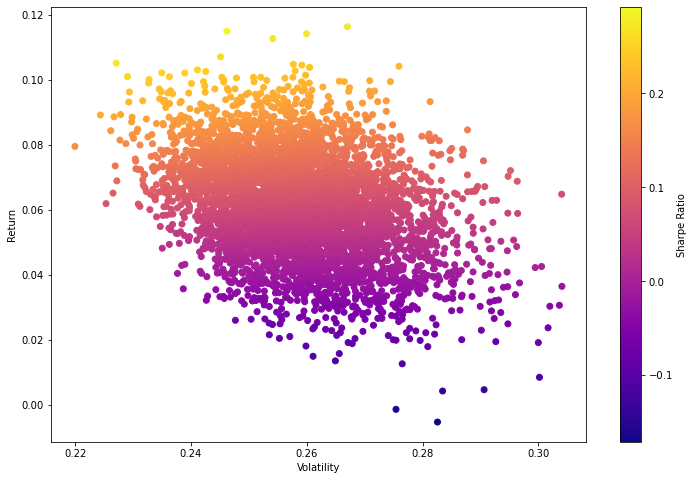

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

In [30]:
ret_arr[sharpe_arr.argmax()]

0.11492145109720774

In [31]:
ret_arr[vol_arr.argmin()]

0.07947787789362318

In [32]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
min_vol_ret = ret_arr[vol_arr.argmin()]
min_vol_port = vol_arr[vol_arr.argmin()]

In [33]:
all_weights[sharpe_arr.argmax(),:]

array([0.12145973, 0.07038048, 0.02016426, 0.11433665, 0.12629786,
       0.05702864, 0.00282138, 0.02590547, 0.12598742, 0.00471381,
       0.09831201, 0.04238616, 0.01724358, 0.10781869, 0.06514387])

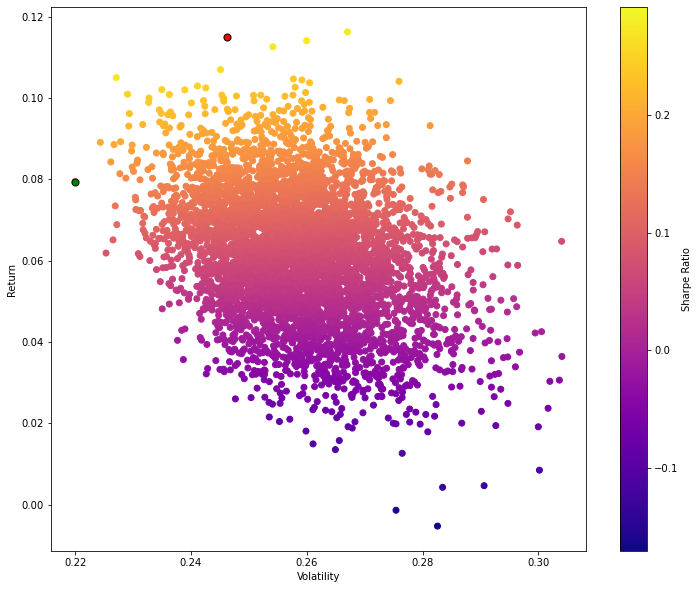

In [34]:
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# add a red dot for max_sr_vol & max_sr_ret
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')
plt.scatter(min_vol_port,min_vol_ret, c='green', s=50, edgecolors='black')

In [35]:
def get_ret_vol_sr(weights): 
    weights = np.array(weights)
    ret = np.sum(log_rets.mean() * weights) * TRADING_DAYS_PER_YEAR
    vol = np.sqrt(np.dot(weights.T,np.dot(log_rets.cov()*TRADING_DAYS_PER_YEAR,weights)))
    sr = (ret - RISK_FREE_RATE)/vol 
    return np.array([ret,vol,sr])

In [36]:
from scipy.optimize import minimize

In [37]:
# minimize negative Sharpe Ratio
def neg_sharpe(weights): 
    return get_ret_vol_sr(weights)[2] * -1

# check allocation sums to 1
def check_sum(weights): 
    return np.sum(weights) - 1

# create constraint variable
cons = ({'type':'eq','fun':check_sum})

# create weight boundaries
bounds = ((0,1), (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),)

# initial guess
init_guess = [1/len(a) for _ in range(len(a))]

opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [38]:
opt_results

     fun: -0.524361293360512
     jac: array([-0.09194298, -0.05266119,  0.69441457, -0.00289342, -0.00561493,
       -0.13710605,  0.70390182,  0.53068019, -0.18543067,  1.15930068,
       -0.18559723,  0.02737428,  0.40113592, -0.18534317, -0.18543041])
 message: 'Optimization terminated successfully'
    nfev: 144
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([3.46005589e-17, 0.00000000e+00, 2.04139280e-15, 1.16960406e-15,
       0.00000000e+00, 0.00000000e+00, 6.16454386e-16, 1.02446211e-15,
       8.41124427e-02, 0.00000000e+00, 6.65106620e-01, 1.65919370e-16,
       1.79800725e-16, 2.85023513e-02, 2.22278585e-01])

In [39]:
opt_results.x  

array([3.46005589e-17, 0.00000000e+00, 2.04139280e-15, 1.16960406e-15,
       0.00000000e+00, 0.00000000e+00, 6.16454386e-16, 1.02446211e-15,
       8.41124427e-02, 0.00000000e+00, 6.65106620e-01, 1.65919370e-16,
       1.79800725e-16, 2.85023513e-02, 2.22278585e-01])

In [40]:
get_ret_vol_sr(opt_results.x)

array([0.16452457, 0.23175732, 0.52436129])